# 6.4 Machine Learning

# Question 2: Importing libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Ensuring that the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
path = '/Users/seanward/Desktop/6- Achievement'

In [9]:
# Import the recipes data.

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'worldometer_data_edited2.csv'))

## Question 3: Data cleaning

In [10]:
df.columns

Index(['Unnamed: 0', 'Country/Region', 'Population', 'Total Cases',
       'Total Deaths', '% of Population With Covid',
       '% of Cases that Result in Death', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'Total Tests', 'Tests/1M pop', 'WHO Region', 'Test Rate',
       'Country Test Rate', 'country_flag'],
      dtype='object')

In [11]:
df.head(20)

,Unnamed: 0,Country/Region,Population,Total Cases,Total Deaths,% of Population With Covid,% of Cases that Result in Death,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,WHO Region,Test Rate,Country Test Rate,country_flag
0,0,USA,331198130,5032179,162804.0,1.519%,3.235%,15194,492.0,63139605.0,190640.0,Americas,0.190640,0.190640,High Test Rate
1,1,Brazil,212710692,2917562,98644.0,1.372%,3.381%,13716,464.0,13206188.0,62085.0,Americas,0.062085,0.062085,Medium Test Rate
2,2,India,1381344997,2025409,41638.0,0.147%,2.056%,1466,30.0,22149351.0,16035.0,South-EastAsia,0.016035,0.016035,Lower Test Rate
3,3,Russia,145940924,871894,14606.0,0.597%,1.675%,5974,100.0,29716907.0,203623.0,Europe,0.203623,0.203623,High Test Rate
4,4,South Africa,59381566,538184,9604.0,0.906%,1.785%,9063,162.0,3149807.0,53044.0,Africa,0.053044,0.053044,Medium Test Rate
5,5,Mexico,129066160,462690,50517.0,0.358%,10.918%,3585,391.0,1056915.0,8189.0,Americas,0.008189,0.008189,Lower Test Rate
6,6,Peru,33016319,455409,20424.0,1.379%,4.485%,13793,619.0,2493429.0,75521.0,Americas,0.075521,0.075521,Medium Test Rate
7,7,Chile,19132514,366671,9889.0,1.916%,2.697%,19165,517.0,1760615.0,92022.0,Americas,0.092022,0.092022,Medium Test Rate
8,8,Colombia,50936262,357710,11939.0,0.702%,3.338%,7023,234.0,1801835.0,35374.0,Americas,0.035374,0.035374,Medium Test Rate
9,9,Spain,46756648,354530,28500.0,0.758%,8.039%,7582,610.0,7064329.0,151087.0,Europe,0.151087,0.151087,High Test Rate


In [12]:
df.shape

(208, 15)

In [13]:
# Renaming the columns

df.rename(columns = {'Country/Region' : 'Country' }, inplace = True)

In [14]:
# Dropping columns that are not needed.

df = df.drop(columns = ['Unnamed: 0', 'Test Rate' ])

In [15]:
df.info

<bound method DataFrame.info of                    Country  Population  Total Cases  Total Deaths  \
0                      USA   331198130      5032179      162804.0   
1                   Brazil   212710692      2917562       98644.0   
2                    India  1381344997      2025409       41638.0   
3                   Russia   145940924       871894       14606.0   
4             South Africa    59381566       538184        9604.0   
..                     ...         ...          ...           ...   
203             Montserrat        4992           13           1.0   
204  Caribbean Netherlands       26247           13           NaN   
205       Falkland Islands        3489           13           NaN   
206           Vatican City         801           12           NaN   
207         Western Sahara      598682           10           1.0   

    % of Population With Covid % of Cases that Result in Death  \
0                       1.519%                          3.235%   
1      

Missing Values



In [16]:
# Check for missing values

df.isnull().sum()

Country                             0
Population                          0
Total Cases                         0
Total Deaths                       21
% of Population With Covid          0
% of Cases that Result in Death     0
Tot Cases/1M pop                    0
Deaths/1M pop                      21
Total Tests                        17
Tests/1M pop                       17
WHO Region                          0
Country Test Rate                  17
country_flag                       17
dtype: int64

In [25]:
df['Total Deaths'].value_counts (dropna = False)

NaN       21
1.0        7
3.0        5
15.0       4
2.0        3
          ..
76.0       1
23.0       1
42.0       1
21.0       1
9604.0     1
Name: Total Deaths, Length: 150, dtype: int64

In [26]:
df['Total Deaths'].fillna(0, inplace=True)

In [27]:
df['Deaths/1M pop'].fillna(0, inplace=True)

In [28]:
df['Total Tests'].fillna(0, inplace=True)

In [29]:
df['Tests/1M pop'].fillna(0, inplace=True)

In [30]:
df['Country Test Rate'].fillna(0, inplace=True)

In [32]:
df['country_flag'].value_counts (dropna = False)

Lower Test Rate     87
Medium Test Rate    61
High Test Rate      43
NaN                 17
Name: country_flag, dtype: int64

Duplicates check

In [17]:
dups = df.duplicated()

In [18]:
dups.shape

(208,)

Extreme values checks

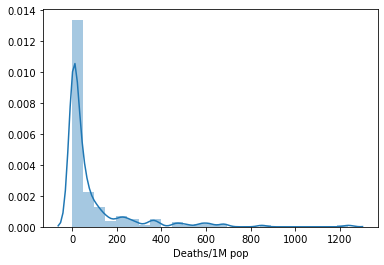

In [55]:
sns.distplot(df['Deaths/1M pop'], bins=25)

In [56]:
df['Deaths/1M pop'].mean()

88.71817307692307

In [57]:
df['Deaths/1M pop'].median()

20.0

In [59]:
df['Deaths/1M pop'].max()

1238.0

# Question 4: Explore Data Visually

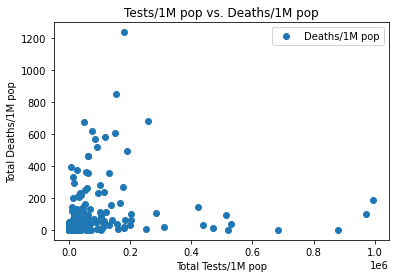

In [60]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Tests/1M pop', y='Deaths/1M pop',style='o') 
plt.title('Tests/1M pop vs. Deaths/1M pop')  
plt.xlabel('Total Tests/1M pop')  
plt.ylabel('Total Deaths/1M pop')  
plt.show()

# Question 5: State your Hypothesis

# Hypothesis: Countries with stricter mask guidelines and more shutdowns have kept the virus at a lower rate.  Countries with more testing have lower death rates as compared to case counts.  With more testing, countries can prevent further spread of the virus and quickly get sick people the health care needed to prevent death.  

# Question 6: Reshape the variables into NumPy arrays

In [61]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Tests/1M pop'].values.reshape(-1,1)
y = df['Deaths/1M pop'].values.reshape(-1,1)

In [62]:
X

array([[1.90640e+05],
       [6.20850e+04],
       [1.60350e+04],
       [2.03623e+05],
       [5.30440e+04],
       [8.18900e+03],
       [7.55210e+04],
       [9.20220e+04],
       [3.53740e+04],
       [1.51087e+05],
       [3.10680e+04],
       [2.57873e+05],
       [1.04277e+05],
       [9.30400e+03],
       [7.43200e+03],
       [1.17443e+05],
       [6.01910e+04],
       [1.75640e+04],
       [1.02452e+05],
       [6.11470e+04],
       [2.71110e+04],
       [1.52200e+04],
       [5.96500e+03],
       [1.14339e+05],
       [1.81993e+05],
       [1.15099e+05],
       [1.31700e+03],
       [1.46350e+04],
       [1.57060e+04],
       [8.54290e+04],
       [6.04110e+04],
       [2.03581e+05],
       [2.55490e+04],
       [2.59630e+04],
       [5.57690e+04],
       [1.52407e+05],
       [1.22105e+05],
       [1.42269e+05],
       [5.31470e+05],
       [6.86310e+04],
       [6.30070e+04],
       [2.51817e+05],
       [9.62400e+03],
       [1.67308e+05],
       [6.27520e+04],
       [1.

In [63]:
y

array([[4.920e+02],
       [4.640e+02],
       [3.000e+01],
       [1.000e+02],
       [1.620e+02],
       [3.910e+02],
       [6.190e+02],
       [5.170e+02],
       [2.340e+02],
       [6.100e+02],
       [2.140e+02],
       [6.830e+02],
       [8.800e+01],
       [2.700e+01],
       [2.000e+01],
       [5.820e+02],
       [6.900e+01],
       [9.400e+01],
       [1.100e+02],
       [4.640e+02],
       [1.280e+02],
       [2.000e+01],
       [2.000e+01],
       [2.370e+02],
       [6.300e+01],
       [5.600e+01],
       [4.800e+01],
       [3.330e+02],
       [2.960e+02],
       [5.710e+02],
       [9.600e+01],
       [6.300e+01],
       [4.200e+01],
       [1.150e+02],
       [3.640e+02],
       [8.500e+02],
       [1.100e+02],
       [6.100e+01],
       [3.600e+01],
       [1.330e+02],
       [3.590e+02],
       [5.000e+00],
       [1.180e+02],
       [1.710e+02],
       [4.700e+01],
       [5.000e+00],
       [1.430e+02],
       [9.100e+01],
       [8.000e+00],
       [2.600e+02],


In [64]:
# Question 7: Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Question 8: Linear Regression 

In [65]:
# Create a regression object.

regression = LinearRegression()  

In [66]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [67]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

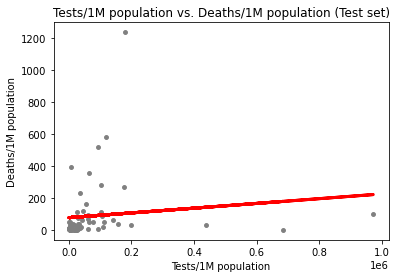

In [68]:
# Question 9: Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Tests/1M population vs. Deaths/1M population (Test set)')
plot_test.xlabel('Tests/1M population')
plot_test.ylabel('Deaths/1M population')
plot_test.show()

# Question 10: Interpretation of how well the line fits: There are very few dots that match up with the regression line on this chart.  I can already see that the regression line will not be a good predictor.

In [69]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [70]:
# Question 11: Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00014857]]
Mean squared error:  35301.20144584325
R2 score:  0.014471398455529472


In [71]:
y_predicted

array([[ 92.32130299],
       [ 77.84473294],
       [ 80.68614554],
       [ 78.04545181],
       [ 80.33477609],
       [ 81.37373024],
       [ 93.28077188],
       [106.38766963],
       [ 77.55680313],
       [ 77.5645288 ],
       [ 77.04943455],
       [103.39278361],
       [ 77.17304529],
       [ 79.92056127],
       [ 81.36704457],
       [ 76.82880722],
       [ 79.22881659],
       [ 97.96579697],
       [ 77.43334097],
       [ 92.05016166],
       [ 81.66998001],
       [ 94.27738342],
       [ 90.50057037],
       [ 88.04573845],
       [ 78.65815694],
       [ 77.12074844],
       [ 80.10493738],
       [ 77.13768549],
       [103.05671693],
       [221.38532031],
       [ 83.49100977],
       [ 76.82880722],
       [ 76.82880722],
       [ 77.41655249],
       [ 79.10268015],
       [ 76.82880722],
       [178.53503548],
       [ 77.01288619],
       [ 85.77141981],
       [ 82.25683385],
       [ 80.10478881],
       [ 77.71503081],
       [ 77.08806291],
       [ 85

In [72]:
# Question 12: Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,88.0,92.321303
1,13.0,77.844733
2,115.0,80.686146
3,391.0,78.045452
4,26.0,80.334776
5,4.0,81.373730
6,49.0,93.280772
7,30.0,106.387670
8,11.0,77.556803
9,0.1,77.564529


Compare how the regression fits the training set

In [73]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [74]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [75]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00014857]]
Mean squared error:  24509.76684642086
R2 score:  0.018416677413267135


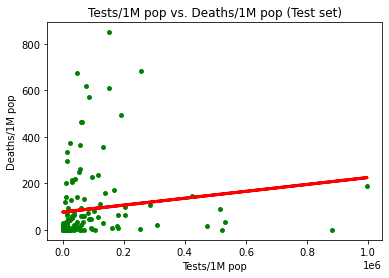

In [76]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Tests/1M pop vs. Deaths/1M pop (Test set)')
plot_test.xlabel('Tests/1M pop')
plot_test.ylabel('Deaths/1M pop')
plot_test.show()

# Question 13: Thoughts... Looking at the regression chart, I can see that every value for Deaths/1M pop. over 300 per 1M has a test rate of below 30% (0.3).  However, the slope actually has a very slight positive relationship (meaning higher test rate actually leads to higher death rate).  The mean squared error shows that many of the plots are far from the regression line making it very hard to predict death rate based on test rate.  This is why the R2 score is so low (only 14.4%) making this model a bad fit.  There are many factors that may effect these numbers (amount of testing, mask mandates, shutdowns).  That is why the predicted figures are so different from the actual figures.  In terms of data bias, the reporting that each country has may not be universally accurate.  There have been many accusations that the figures are not being reported properly which can definitely alter the numbers.